In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math

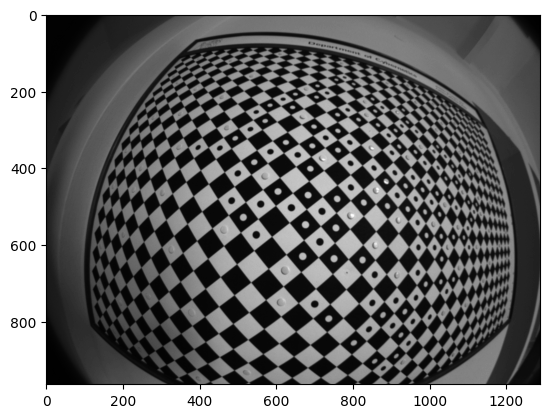

In [2]:
im1= plt.imread("Data/Radial01.png")
im2 =plt.imread("Data/Radial02.png")
plt.imshow(im1,cmap="gray")

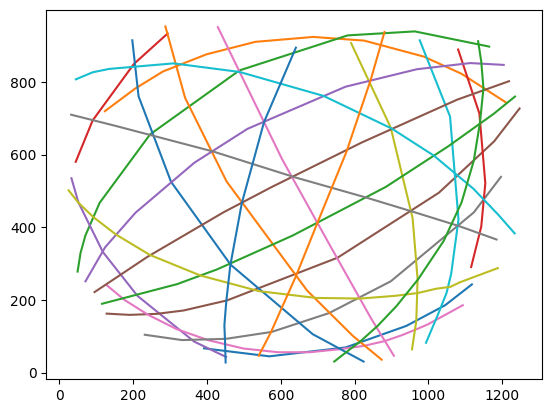

In [3]:
lines=sio.loadmat("Data/lines.mat")
lines=lines['lines'][0]
for l in lines:
    plt.plot(l[0],l[1])

In [4]:
#Data of camera
im_center = np.array([ 676, 503 ])
f = 456

In [12]:
def undistortPoint(point:np.array)->np.array:
    translatedPoint=point-im_center
    w=np.linalg.norm(translatedPoint)
    if w==0:
        return np.array([0,0])
    alpha=w/f
    undistortedRadius=f*math.tan(alpha)
    normedPoint=translatedPoint/w
    return normedPoint*undistortedRadius


In [6]:
def undistortLines(lines:np.array):
    undistortedLines=[]
    for line in lines:
        points=[]
        Range=line.shape[1]
        for i in range(Range):
            newPOint=undistortPoint(line[:,i])
            points.append(newPOint)
        undistortedLines.append(np.array(points))
    return undistortedLines

newLines=undistortLines(lines)

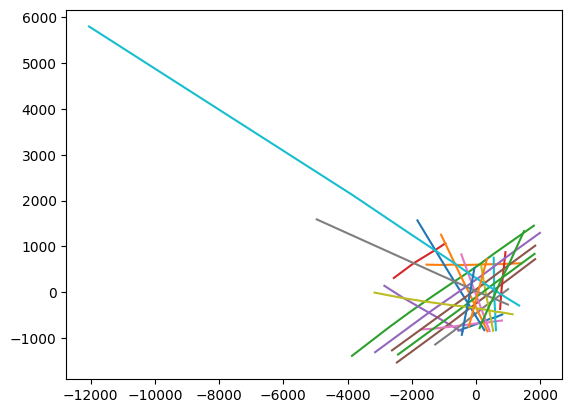

In [7]:
for line in newLines:
    plt.plot(line[:,0],line[:,1])

In [14]:
def undistortImage(img:np.array,resH:int,resW:int,origin:np.array)->np.array:
    #Calculate new image coordinates
    h,w=img.shape
    newImage=np.zeros((resH,resW))
    for i in range(h):
        for j in range(w):
            pxCoordinates=np.array([j,h-(i+1)])
            newCoords=undistortPoint(pxCoordinates)-origin
            newCoords=newCoords.astype(int)
            if newCoords[0]>=resH or newCoords[1]>=resW or newCoords[0]<0 or newCoords[1]<0:
                continue
            newImage[newCoords[0],newCoords[1]]+=img[i,j]
            #print(newImage[newCoords[0],newCoords[1]])
    return newImage

In [15]:
newImage=undistortImage(im1,3000,3000,np.array([-2000,1000]))
for i in newImage:
    for element in i:
        if element>0:
            print(element)
            break

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


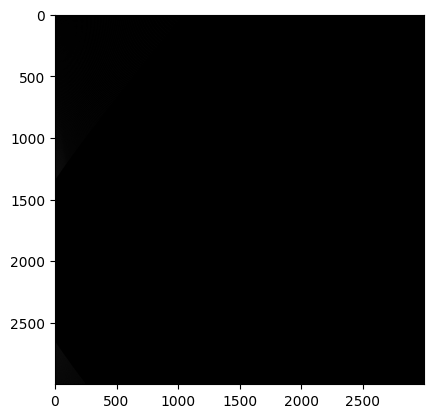

In [ ]:
plt.imshow(newImage,cmap="gray")